In [1]:
import numpy as np
from datetime import datetime
import datetime

In [18]:
#count = 0
magnetic_data = open("AC_H3_MFI_65615.txt", "r")
lines = magnetic_data.readlines()
old_B = "0"
mag_data = [[] for y in range(7)]
for line in lines:
    (date, time, B) = line.split()
    time = date + ' ' + time
    #if count % 4 == 0:
    mag_data[0].append(datetime.datetime.strptime(time, "%d-%m-%Y %H:%M:%S.%f"))
    if B != '-1.00000E+31':
        mag_data[1].append(float(B))
        old_B = B
    else:
        mag_data[1].append(float(old_B))
    #count += 1
    #count = count % 4

In [28]:
proton_data = open("AC_H0_SWE_201063.txt", "r")
lines = proton_data.readlines()
old_Np = '0'
old_Tp = '0'
for line in lines:
    (date, time, Np, Tp) = line.split()
    if Np != '-1.00000E+31':
        for i in range(64):
            mag_data[2].append(float(Np))
        old_Np = Np
    else:
        for i in range(64):
            mag_data[2].append(float(old_Np))
    if Tp != '-1.00000E+31':
        for i in range(64):
            mag_data[3].append(float(Tp))
        old_Tp = Tp
    else:
        for i in range(64):
            mag_data[3].append(float(old_Tp))

In [29]:
v_data = open("AC_H0_SWE_228566.txt", "r")
lines = v_data.readlines()
old_v = '0'
for line in lines:
    (date, time, v) = line.split()
    if v != '-1.00000E+31':
        for i in range(64):
            mag_data[6].append(float(v))
        old_v = v
    else:
        for i in range(64):
            mag_data[6].append(float(old_v))

In [5]:
print(len(mag_data[0]), len(mag_data[2]), len(mag_data[3]))

1080002 1080000 1080000


In [30]:
n = len(mag_data[2])
ns = np.ceil(np.sqrt(n)).astype(int)

In [31]:
for i in range(n):
    Beta = ((4.16 * 0.00001 * mag_data[3][i]) + 5.34) * mag_data[2][i] / (mag_data[1][i] * mag_data[1][i])
    VA = 20 * mag_data[1][i] / (mag_data[2][i] ** 0.5)
    mag_data[4].append(Beta)
    mag_data[5].append(VA)

In [96]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,7)
#plt.subplot(2, 1, 1)
#plt.xticks(np.arange(0, len(mag_data[0])), mag_data[0])

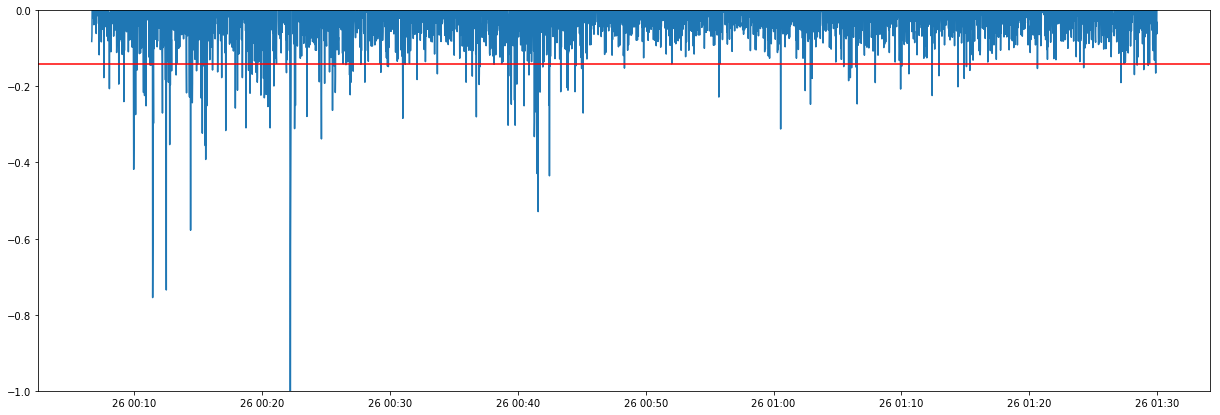

In [106]:
plt.plot(mag_data[0][130000:135000], derivatives[0][130000:135000])
plt.axhline(-0.14, color='r')
plt.ylim(-1, 0)
plt.show()

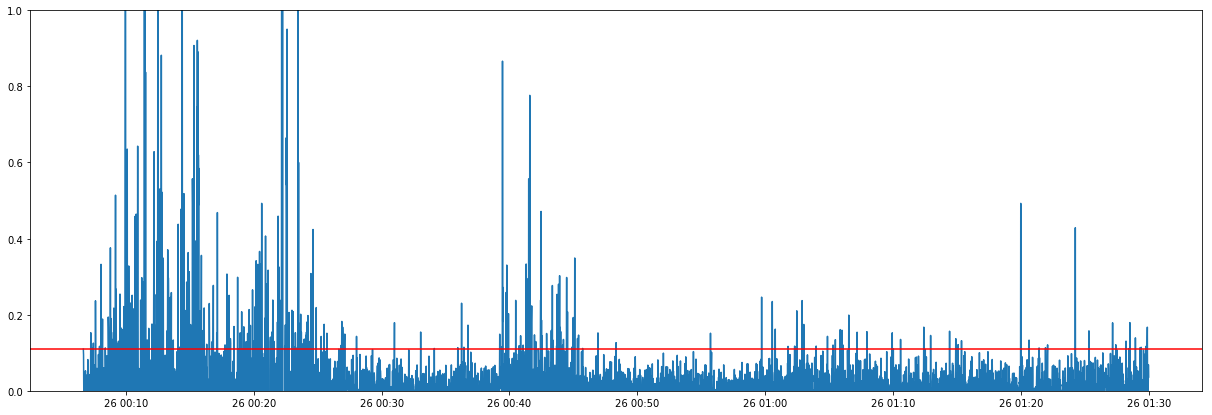

In [105]:
plt.plot(mag_data[0][130000:135000], derivatives[1][130000:135000])
plt.axhline(0.11, color='r')
plt.ylim(0, 1)
plt.show()

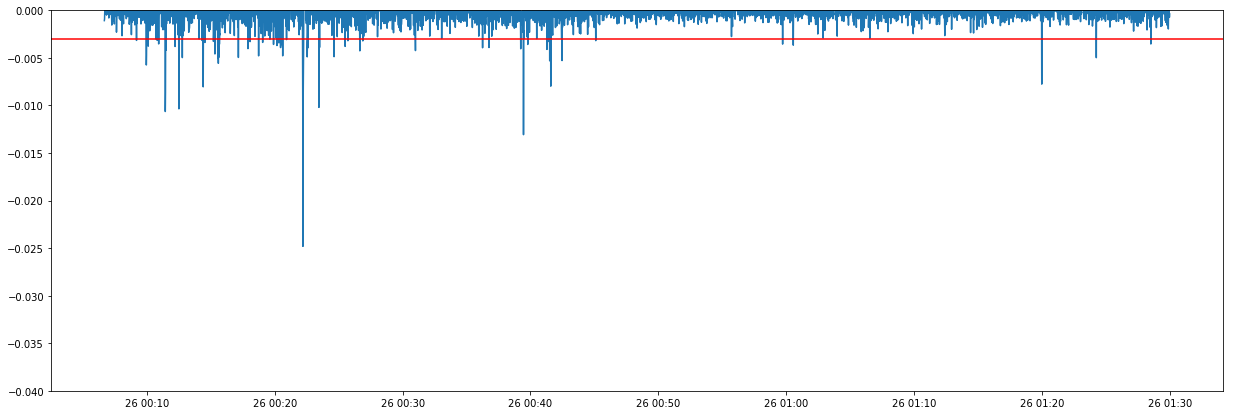

In [112]:
plt.plot(mag_data[0][130000:135000], derivatives[2][130000:135000])
plt.axhline(-0.003, color='r')
plt.ylim(-0.04, 0)
plt.show()

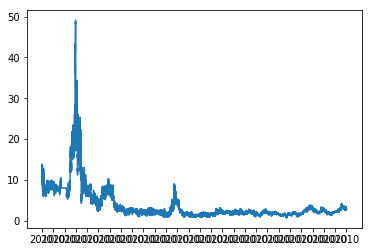

In [14]:
plt.plot(mag_data[0], mag_data[2])
x_ticks = np.arange(mag_data[0][0], mag_data[0][n - 1], (mag_data[0][n - 1] - mag_data[0][0]) / 27)
plt.xticks(x_ticks)
plt.show()

In [1]:
for i in range(10000):
  print(mag_data[0][i], mag_data[2][i])

NameError: name 'mag_data' is not defined

In [80]:
derivatives = []
derivatives.append(np.diff(mag_data[1]))
derivatives.append(np.diff(mag_data[4]))
derivatives.append(np.diff(np.array(mag_data[5][:n])/np.array(mag_data[6][:n])))
derivatives.append(np.minimum(derivatives[0], 0))
derivatives.append(np.maximum(derivatives[1], 0))
derivatives.append(np.minimum(derivatives[2], 0))

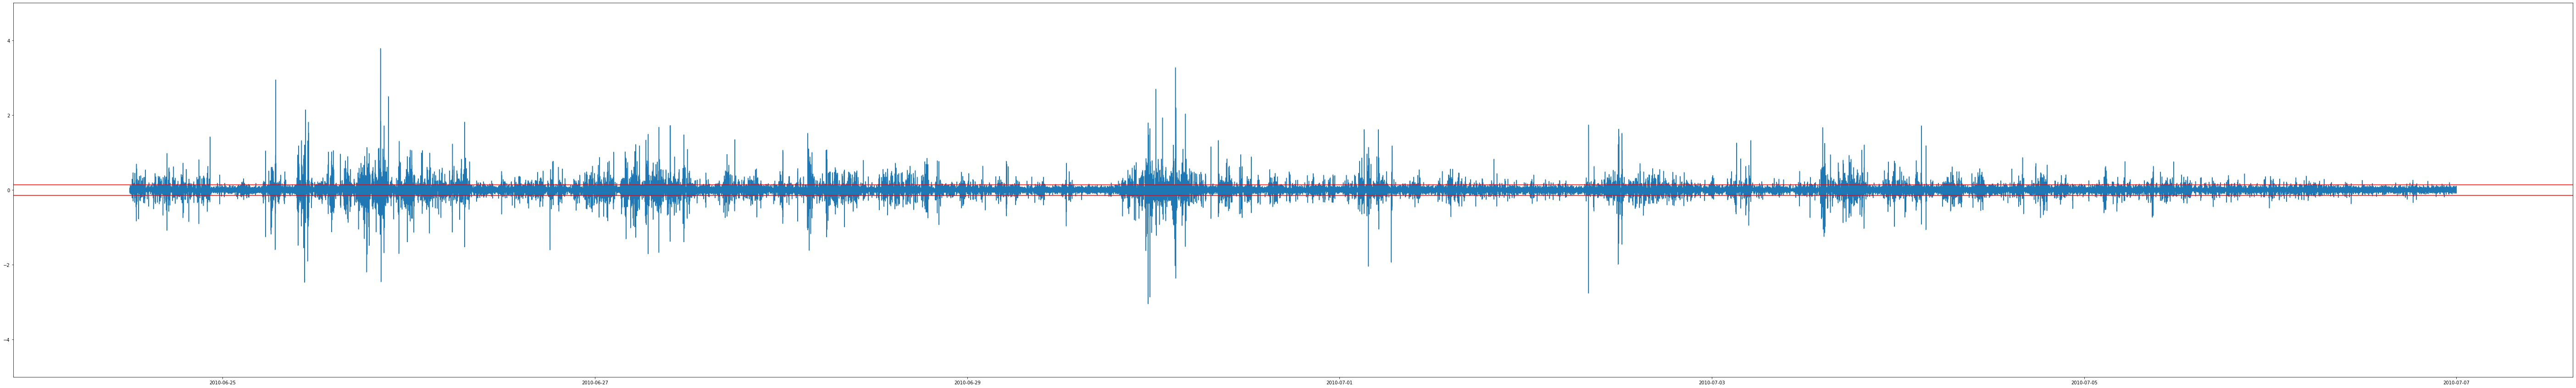

In [0]:
plt.plot(mag_data[0][:n-1], derivatives[0])
plt.ylim(-5, 5)
plt.axhline(0.14, color='r')
plt.axhline(-0.14, color='r')
plt.show()

In [52]:
plt.plot(mag_data[0][:n], mag_data[7][:n], "r")
#plt.axhline(3)
plt.show()

IndexError: list index out of range

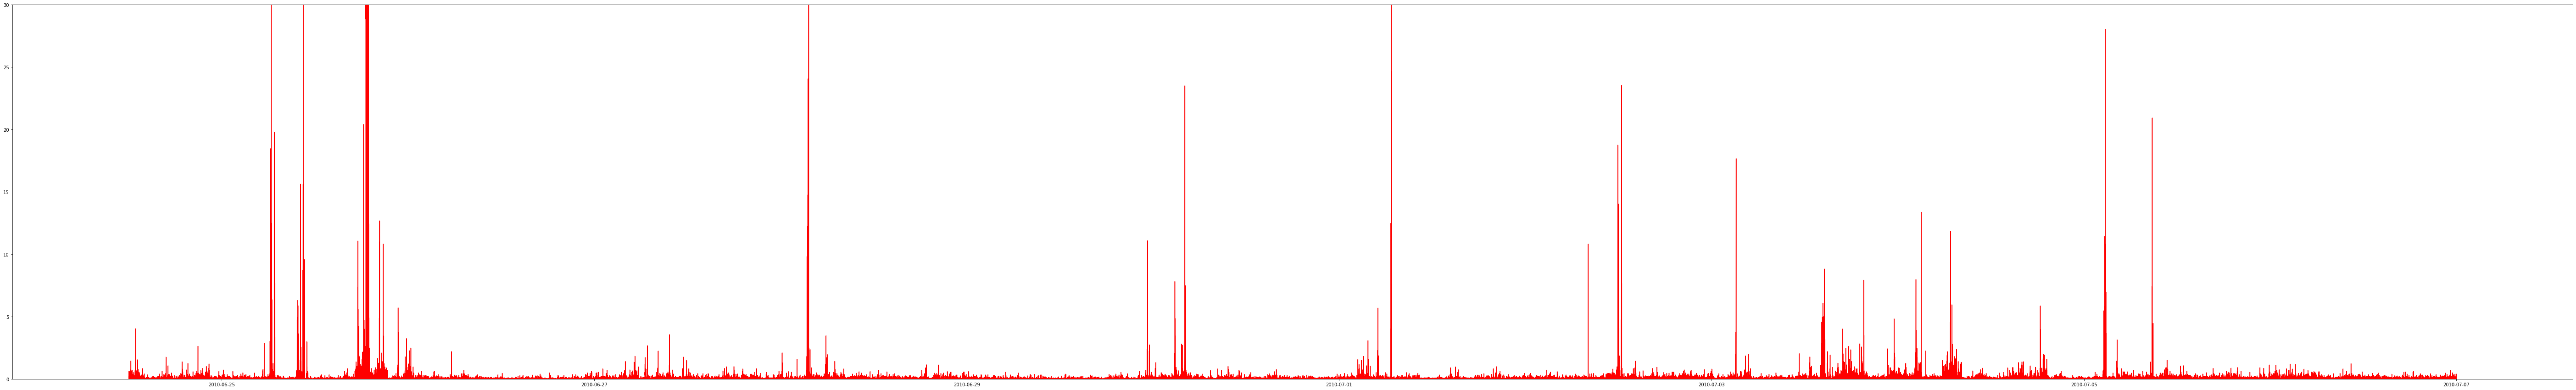

In [0]:
plt.plot(mag_data[0][:n-1], derivatives[1], 'r')
plt.ylim(0, 30)
plt.show()

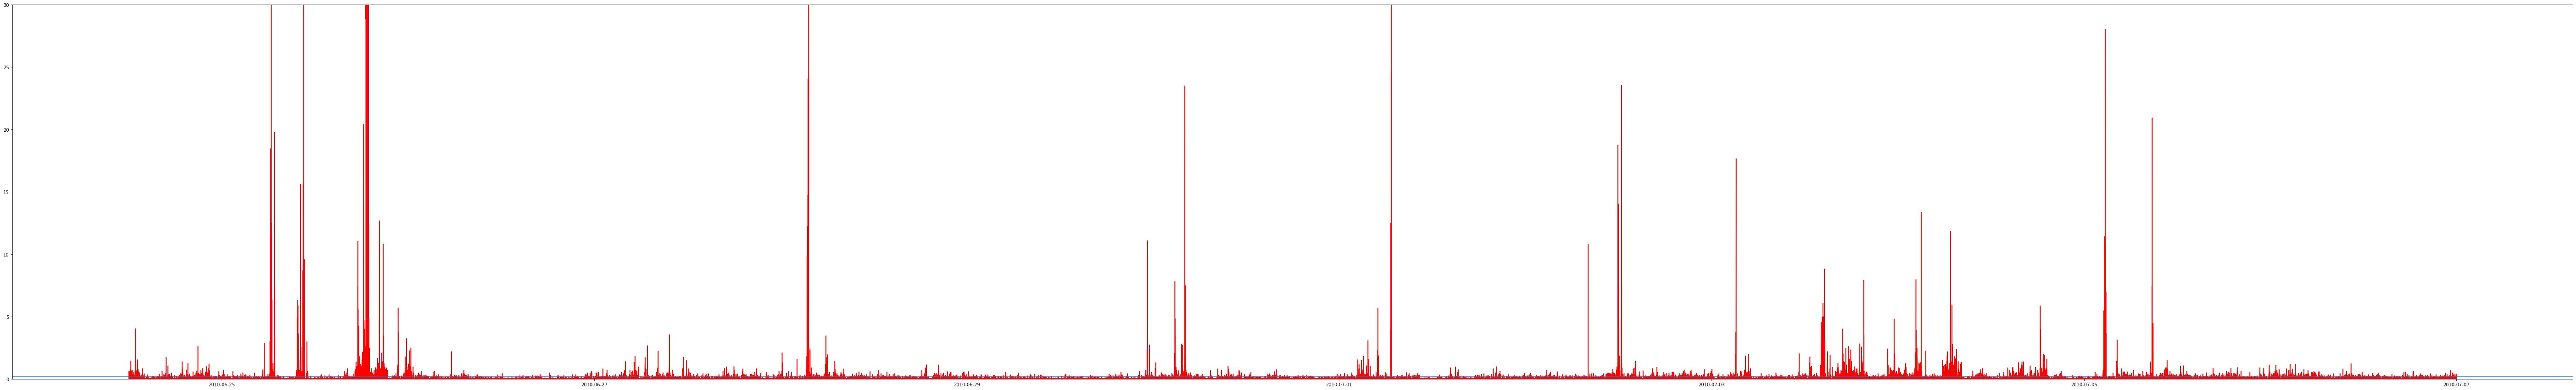

In [0]:
plt.plot(mag_data[0][:n-1], derivatives[1], 'r')
plt.ylim(0, 30)
plt.axhline(0.22)
plt.show()

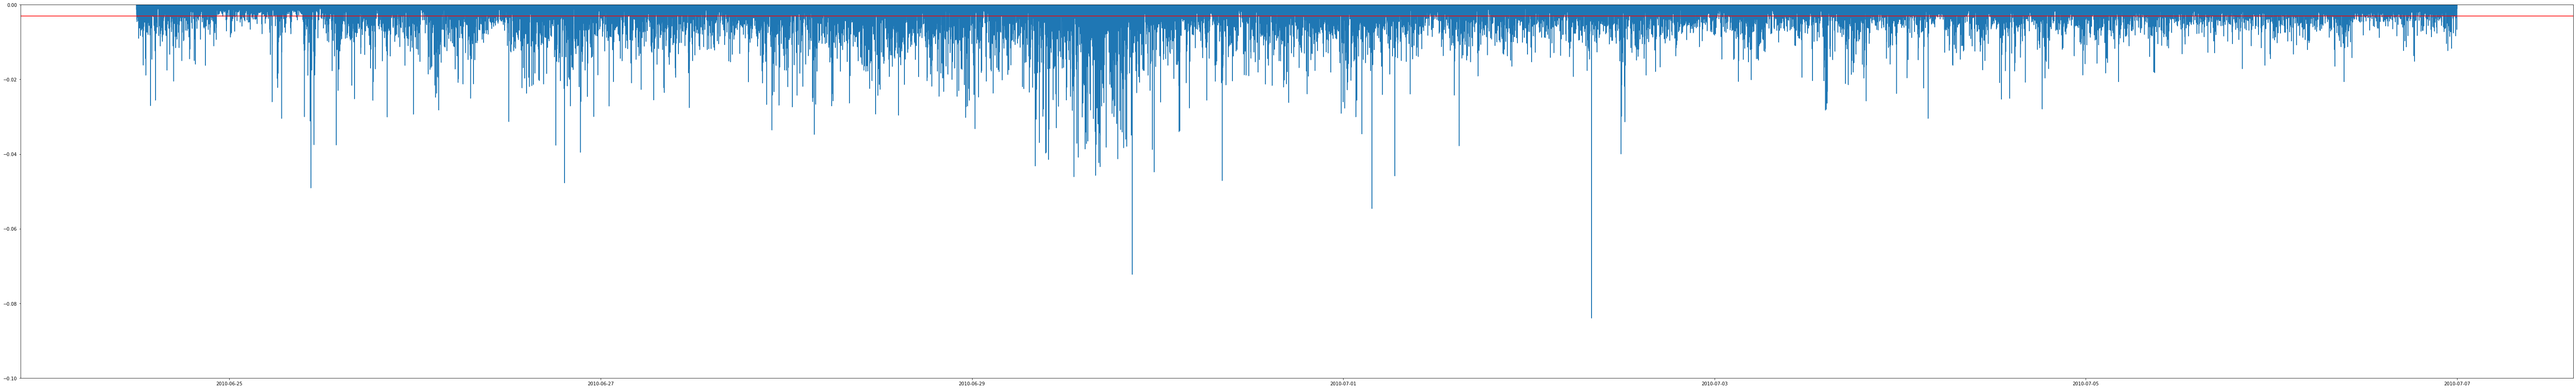

In [0]:
plt.plot(mag_data[0][:n-1], derivatives[2])
plt.ylim(-0.1, 0)
plt.axhline(-0.003, color='r')
plt.show()

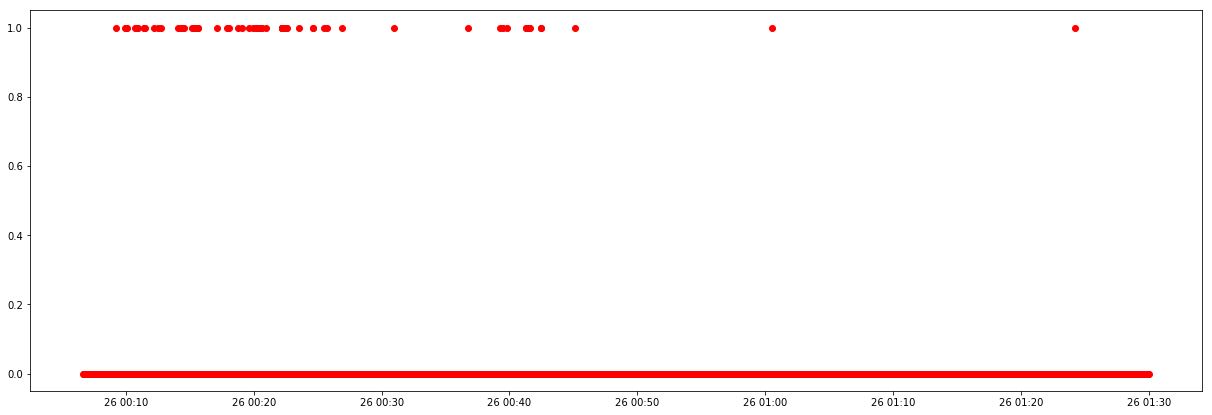

In [111]:
plt.plot(mag_data[0][130000:135000], mag_data[7][130000:135000], "ro")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


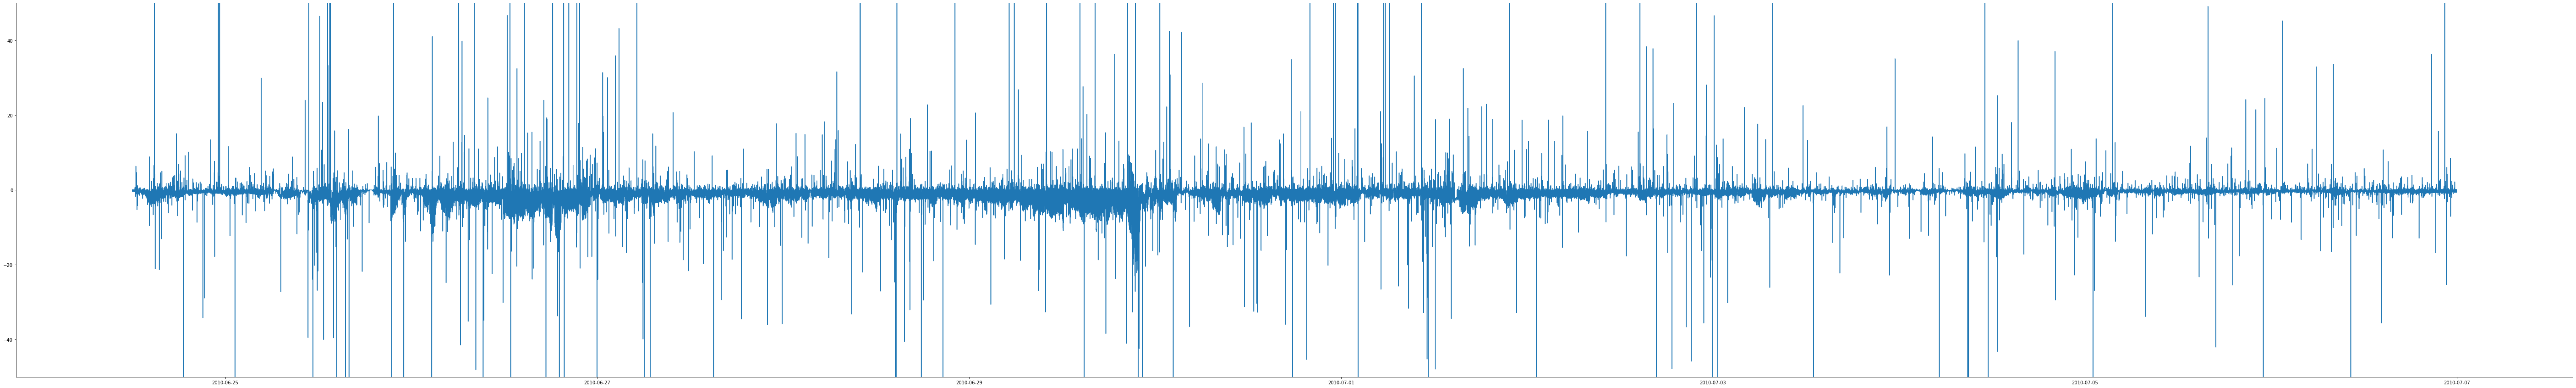

In [0]:
plt.plot(mag_data[0][:n - 1], derivatives[0]/derivatives[1])
plt.ylim(-50, 50)
plt.show()

In [77]:
mag_data.append([0 for i in range(n)])

In [83]:
mag_data[0][140000]

datetime.datetime(2010, 6, 26, 2, 53, 20, 350000)

In [110]:
for i in range(130000,140000):
    if derivatives[0][i] <= -0.14 and derivatives[1][i] >= 0.11 and derivatives[2][i] <= -0.003:
      mag_data[7][i]=(1)
      print(i)
    else:
      mag_data[7][i]=(0)

130151
130197
130198
130206
130243
130248
130255
130286
130287
130290
130332
130350
130366
130445
130458
130459
130464
130472
130512
130519
130532
130533
130535
130537
130540
130629
130674
130684
130724
130743
130777
130794
130810
130811
130819
130827
130833
130837
130855
130930
130931
130932
130933
130934
130935
130952
130953
130956
131010
131077
131078
131130
131143
131213
131460
131805
131954
131967
131987
132077
132078
132081
132090
132095
132146
132148
132306
133233
134655
135039
135040
135082
135290
135295
135459
135614
135807
135837
135838
135915
137211
137957


In [40]:
print(derivatives[2])

[-0.00032062 -0.00026404 -0.00058465 ...  0.00139379  0.00045298
 -0.00104535]


In [46]:
previous_1 = previous_2 = 0
for i in range(n - 1):
    if i % 64 != 0:
      derivatives[1][i] = previous_1
      derivatives[2][i] = previous_2
    else:
      previous_1 = derivatives[1][i] 
      previous_2 = derivatives[2][i]

In [51]:
count = 0
for i in range(n - 1):
    if mag_data[7][i] == 1:
        count += 1
print(count)

7115


In [82]:
count = 0
f = open("outputACE_part.txt","w+")
f.write("Date\tTime\tB_der\tbeta_der\tVA/V_der\t|B|\tNP\tT\tbeta\tVA\tV\n")
for i in range(130000, 140000):
    #if i % 60 == 0:
        #if count != 0:
            #f.write(str(count))
            #f.write("\n")
        #count = 0
    if mag_data[7][i] == 1:
        #if count == 0:
          f.write(datetime.datetime.strftime(mag_data[0][i] - datetime.timedelta(microseconds=mag_data[0][i].microsecond), "%d-%m-%Y %H:%M:%S.%f"))
          #f.write(datetime.datetime.strftime(mag_data[0][i], "%d-%m-%Y %H:%M:%S.%f"))
          f.write("\t")
          f.write(str(derivatives[0][i]))
          f.write("\t")
          f.write(str(derivatives[1][i]))
          f.write("\t")
          f.write(str(derivatives[2][i]))
          f.write("\t")
          f.write(str(mag_data[1][i]))
          f.write("\t")
          f.write(str(mag_data[2][i]))
          f.write("\t")
          f.write(str(mag_data[3][i]))
          f.write("\t")
          f.write(str(mag_data[4][i]))
          f.write("\t")
          f.write(str(mag_data[5][i]))
          f.write("\t")
          f.write(str(mag_data[6][i]))
          f.write("\n")
          #f.write("\t")
          #count += 1
        #else:
          #count += 1
f.close()

In [31]:
import scipy
from scipy import stats
print(scipy.stats.pearsonr(derivatives[3], derivatives[4]))
print(scipy.stats.pearsonr(derivatives[4], derivatives[5]))
print(scipy.stats.pearsonr(derivatives[0], derivatives[1]))
print(scipy.stats.pearsonr(derivatives[1], derivatives[2]))

(-0.15848353975836366, 0.0)
(-0.08698648445179863, 1.6693116025144176e-113)
(-0.02746263137525837, 9.597306247502778e-13)
(-0.1447949092556803, 5.90785358864e-313)


In [46]:
max_correlation = 0
x = 0
for j in np.arange(0, 0.1, 0.001):
    correct = 0
    wrong = 0
    change = 0
    for i in range(n - 1):
      if mag_data[4][i] >= 3:
        change += 1
      if derivatives[2][i] <= -j or derivatives[2][i] >= j:
        change += 1
      if change == 1:
        wrong += 1
      if change == 2:
        correct += 1
      change = 0
    if correct/(correct+wrong) > max_correlation and j != 0.0:
      max_correlation = correct/(correct + wrong)
      x = j
print(x, max_correlation)

0.003 0.10053258939893482


In [0]:
s = np.zeros(ns**2)
s[:n] = mag_data[1]
s = s.reshape(ns,ns)

In [0]:
from numpy.linalg import svd
U, S, VT = svd(s, full_matrices=False)
U = np.matrix(U)
S = np.diag(S)
VT = np.matrix(VT)

In [0]:
new_mag = U[:, :5].dot(S[:5, :5].dot(VT[:5, :]))

In [0]:
new_mag = np.array(new_mag.flatten()).flatten()
print(new_mag)
new_mag = new_mag[:n]

[ 3.71443337  3.71006378  3.70779089 ... -0.09296595 -0.0611128
 -0.05230864]


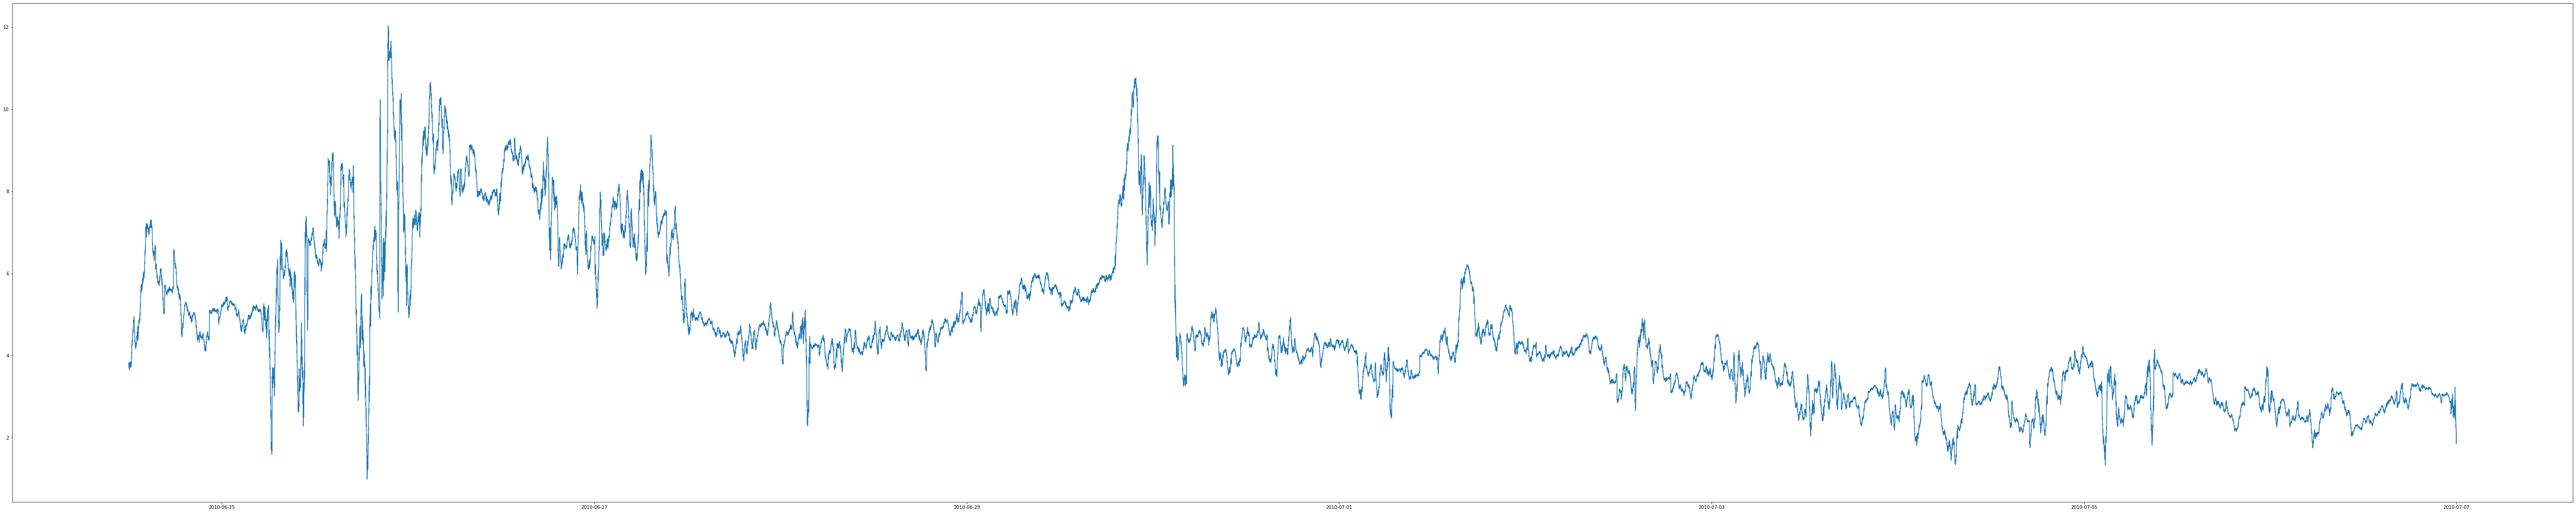

In [0]:
plt.plot(mag_data[0], new_mag)
plt.show()

In [0]:
s = np.zeros(ns**2)
s[:n] = mag_data[4]
s = s.reshape(ns,ns)